# Projet Machine Learning : Prédiction de l'émission de CO2

In [21]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(corrplot)
library(FactoMineR)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
data = read.csv("global-data-on-sustainable-energy (1).csv")

In [3]:
head(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


# Analyse exploratoire des données

In [4]:
str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

Nous pouvons voir ici que toutes les variables sont quantitatives à l'exception de "Entity" et "Density". Cette dernière devrait être plutôt être une variable quanitative

## Convertir Year en une variable qualitative

In [5]:
data$Year = as.factor(data$Year)

## Convertir Density en une variable numérique

In [6]:
data$Density.n.P.Km2. = as.numeric(gsub(",",".",data$Density.n.P.Km2.))

## Determiner le taux de valeurs manquantes

### Taux de valeurs manquantes total

In [7]:
sum(is.na(data))*100/(21*3649)

[1] 9.106213

### Taux de valeurs manquantes par colonne

In [8]:
tx = sapply(data, function(x) sum(is.na(x))*100/(21*3649))
print(tx)

                                                          Entity 
                                                     0.000000000 
                                                            Year 
                                                     0.000000000 
                         Access.to.electricity....of.population. 
                                                     0.013049890 
                               Access.to.clean.fuels.for.cooking 
                                                     0.220543136 
            Renewable.electricity.generating.capacity.per.capita 
                                                     1.214944734 
                  Financial.flows.to.developing.countries..US... 
                                                     2.726121964 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                     0.253167861 
                             Electricity.from.fossil.fuels..TWh. 
          

In [9]:
data$Renewable.electricity.generating.capacity.per.capita = NULL
data$Financial.flows.to.developing.countries..US...= NULL
data$Renewables....equivalent.primary.energy. = NULL

In [10]:
complete_data = na.omit(data)
summary(complete_data)

    Entity               Year      Access.to.electricity....of.population.
 Length:2868        2014   : 147   Min.   :  1.252                        
 Class :character   2015   : 147   1st Qu.: 53.238                        
 Mode  :character   2016   : 146   Median : 97.000                        
                    2017   : 146   Mean   : 76.585                        
                    2018   : 146   3rd Qu.:100.000                        
                    2019   : 146   Max.   :100.000                        
                    (Other):1990                                          
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 22.07                   
 Median : 81.55                   
 Mean   : 62.17                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
                                  
 Renewable.energy.share.in.the.total.final.energy.consumption....
 Min.   : 0.000                                       

In [11]:
str(complete_data)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access.to.electricity....of.population.                         : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access.to.clean.fuels.for.cooking                               : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low.carbon.electricity....e

## Analyse descriptive unidimensionnelle

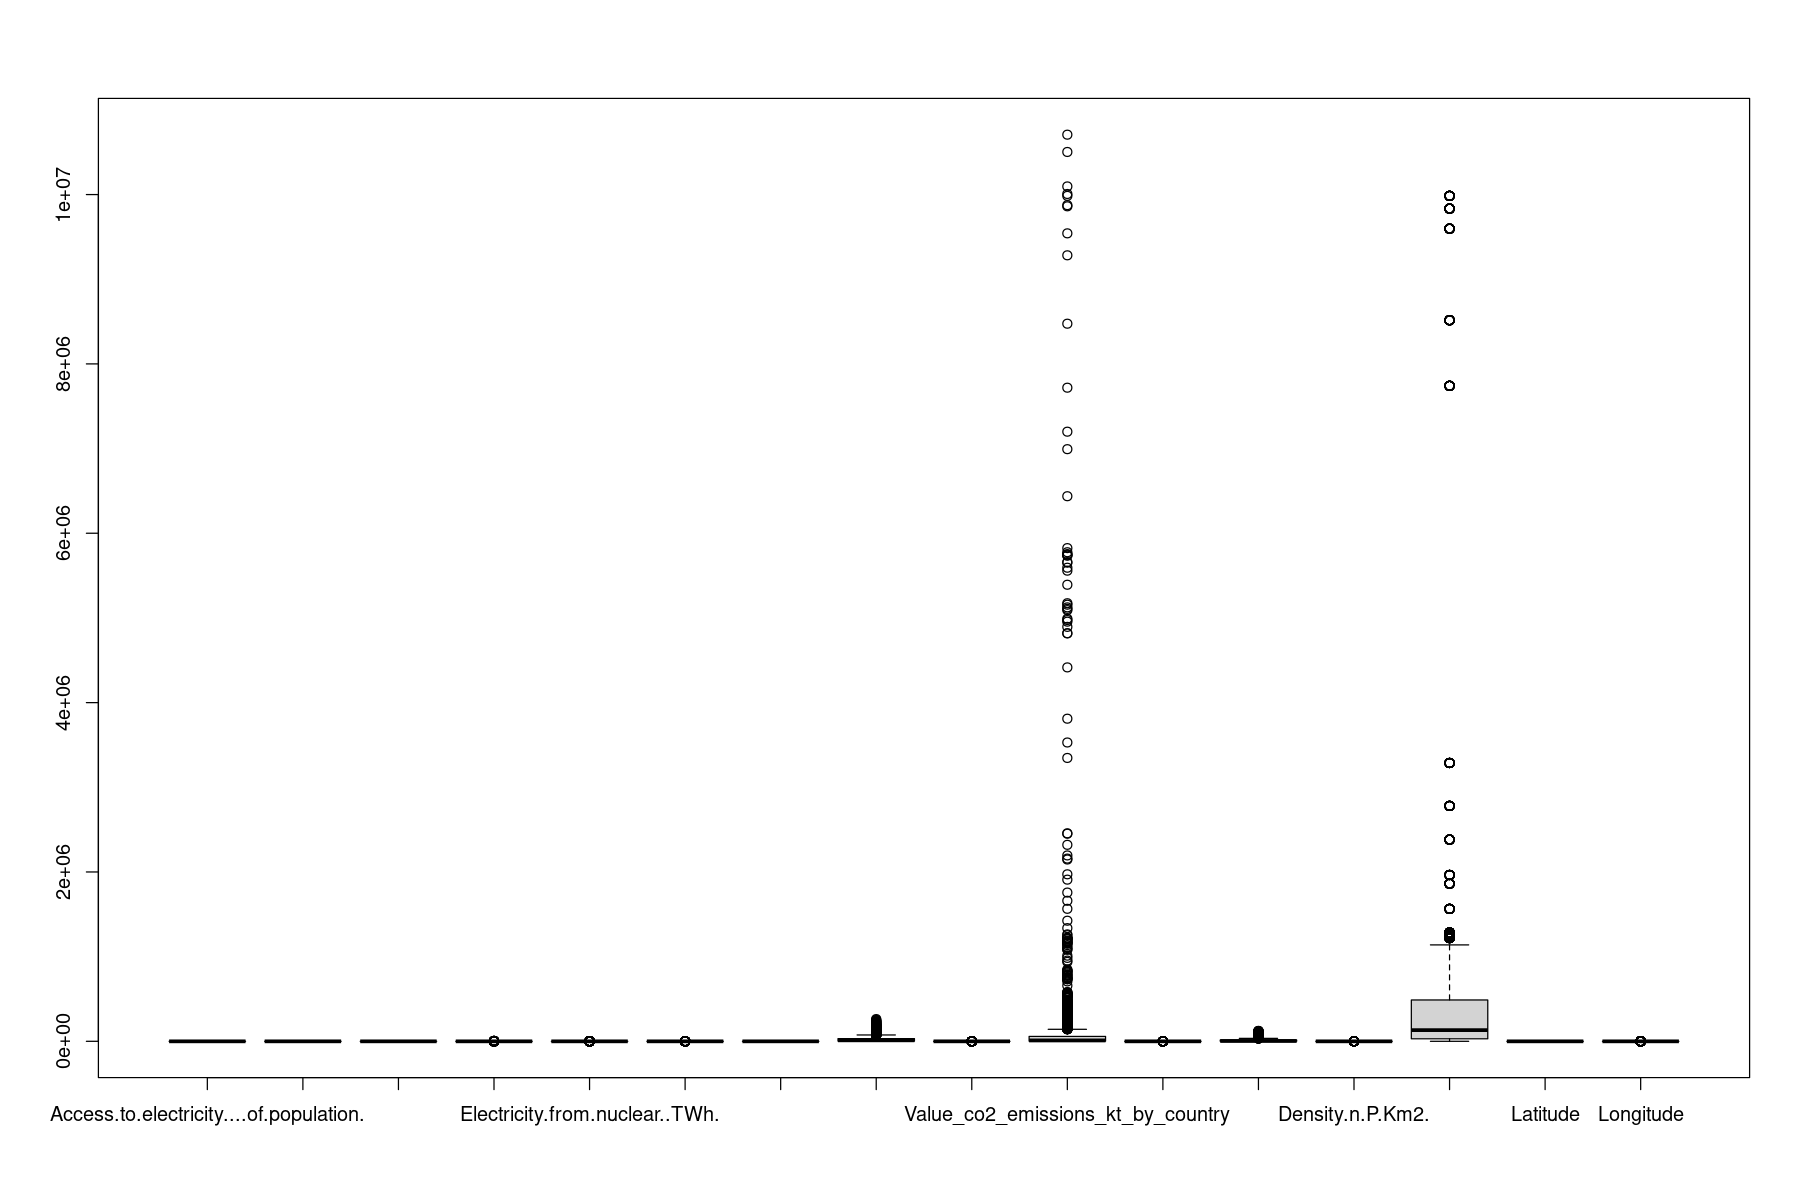

In [12]:
options(repr.plot.width = 15, repr.plot.height = 10)

df = complete_data[,-c(1,2)]
boxplot(df)

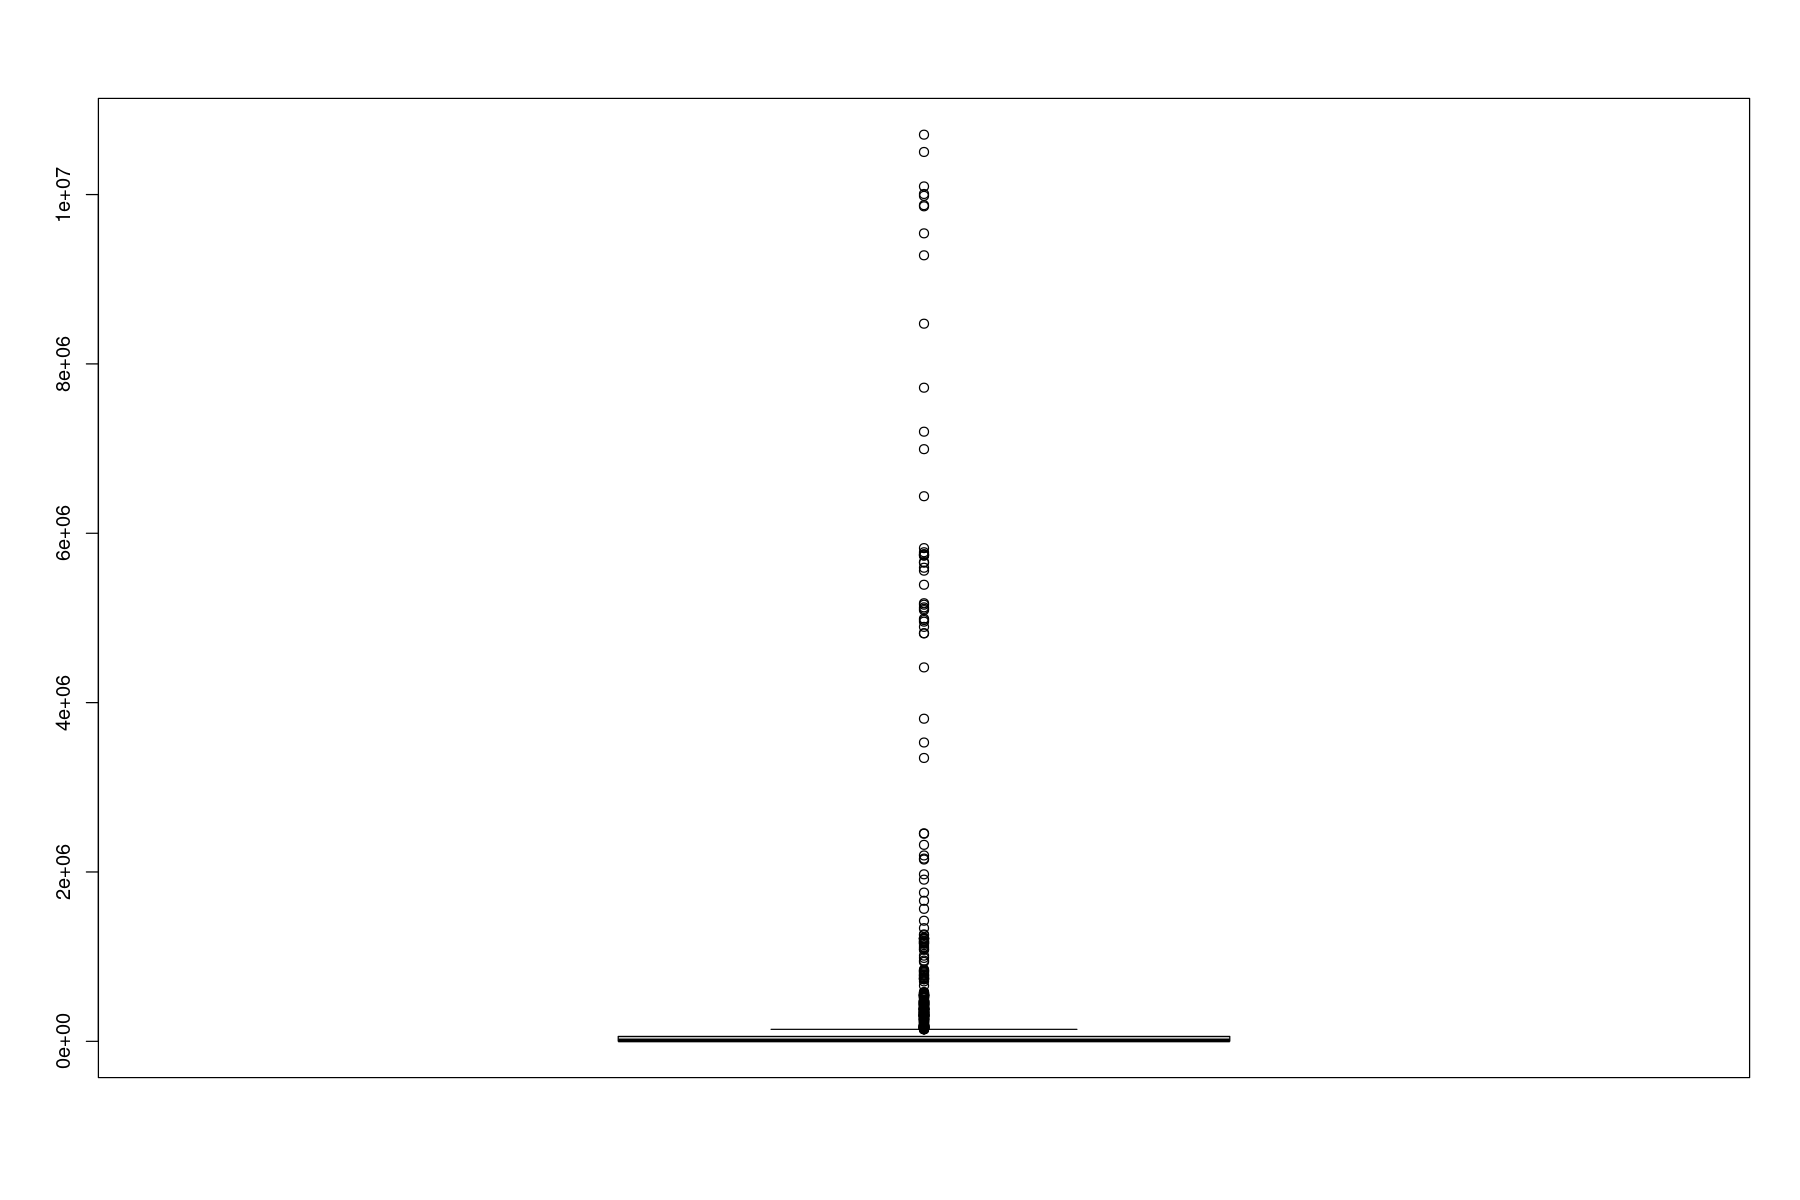

In [13]:
boxplot(df$Value_co2_emissions_kt_by_country)

[1] "Access.to.electricity....of.population."
[1] "Access.to.clean.fuels.for.cooking"
[1] "Renewable.energy.share.in.the.total.final.energy.consumption...."
[1] "Electricity.from.fossil.fuels..TWh."
[1] "Electricity.from.nuclear..TWh."
[1] "Electricity.from.renewables..TWh."
[1] "Low.carbon.electricity....electricity."
[1] "Primary.energy.consumption.per.capita..kWh.person."
[1] "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP."
[1] "Value_co2_emissions_kt_by_country"
[1] "gdp_growth"
[1] "gdp_per_capita"
[1] "Density.n.P.Km2."
[1] "Land.Area.Km2."
[1] "Latitude"
[1] "Longitude"


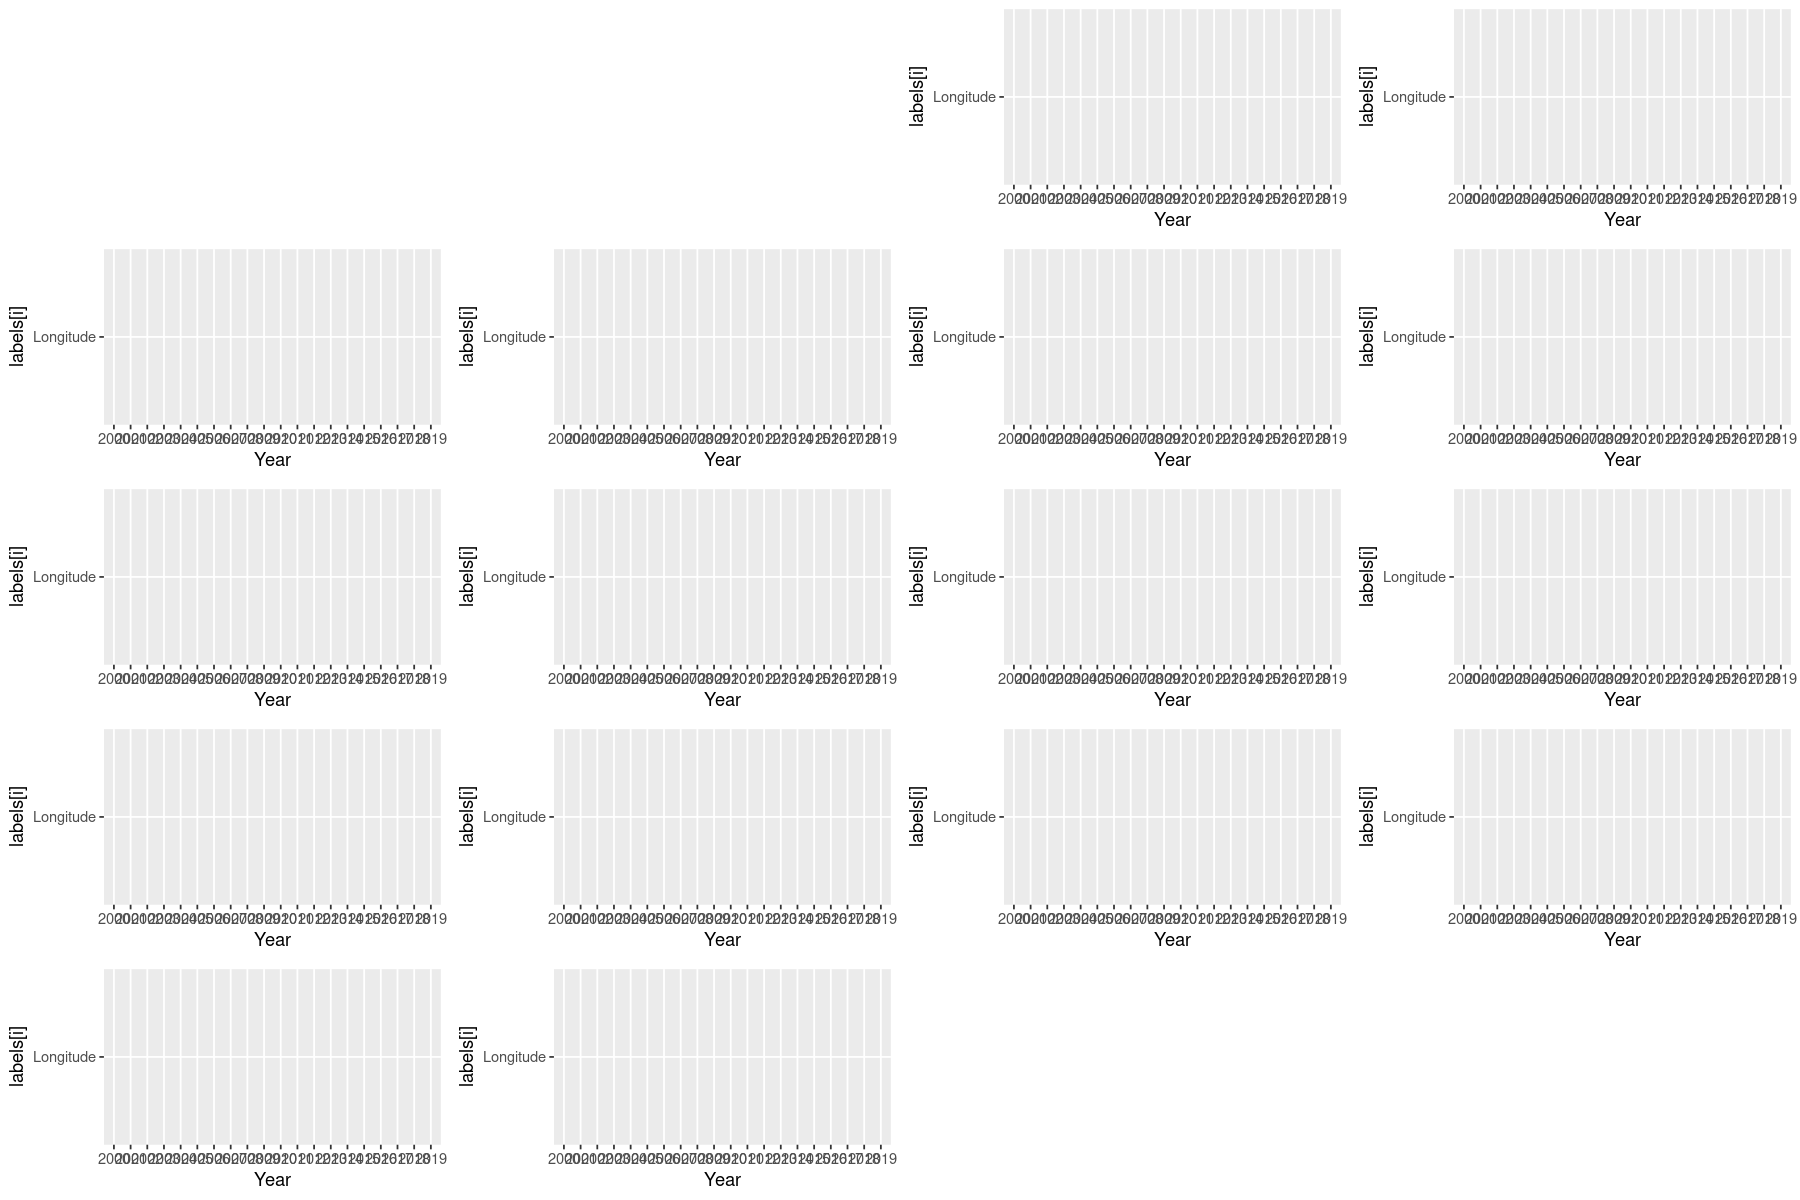

In [20]:

labels = names(complete_data)

dfi = complete_data
v = list()

for (i in 3:18) {
    #dfi$labels[i] = complete_data$labels[,i]
    print(labels[i])
    v[[i]] = ggplot(complete_data) + aes(x=Year, y=labels[i] ,color=Entity) + theme(legend.position = "none")
} 
do.call(grid.arrange,c(v, ncol=4))

In [ ]:
dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point()
}

Les échelles de valeurs sont très différentes en fonction des variables que nous regardons dans notre dataset, nos avons choisi de nous focaliser sur Value_CO2 et nous voyons que celle-ci est composée de beaucoup d'outliers. Donc l'observation en boxplot n'est pas forcément pertinente.

## Q5

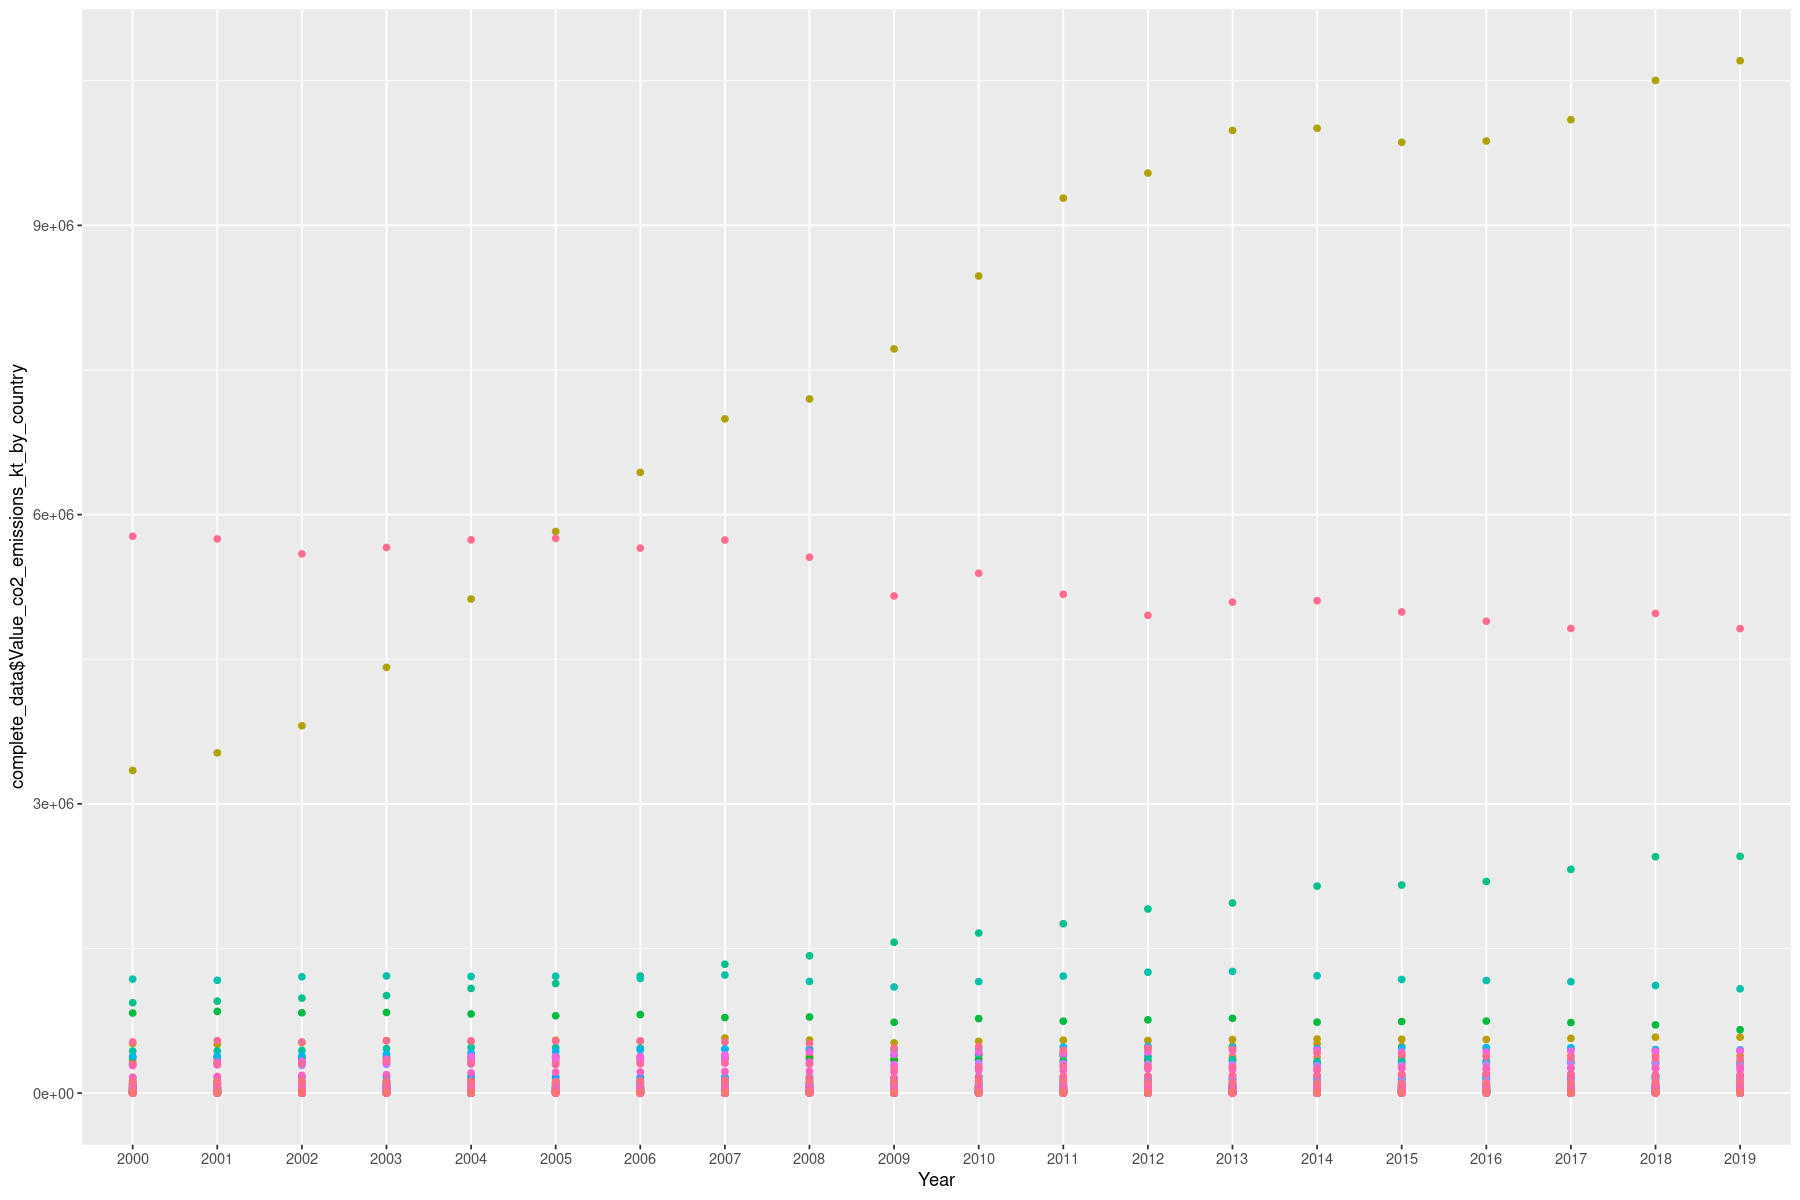

In [16]:
ggplot(complete_data) + aes(x=Year, y=complete_data$Value_co2_emissions_kt_by_country,color=Entity) + geom_point() + theme(legend.position = "none")

In [17]:
sd(complete_data$Value_co2_emissions_kt_by_country)

[1] 818020.2

Ici nous pouvons observer que l'écart type de la variable Value CO2 est très grande, ce qui témoigne d'une hétérogéneité des valeurs par rapport à la répartition moyenne. De plus le graphique que les 5 pays ayant une emission de CO2 la plus importante sont :

In [18]:
Moy = aggregate(data=complete_data,Value_co2_emissions_kt_by_country~Entity,FUN=mean)
index = order(Moy$Value_co2_emissions_kt_by_country, decreasing = TRUE )
Moy_classe = Moy[index,]
print(Moy_classe)

                      Entity Value_co2_emissions_kt_by_country
28                     China                      7636642.4633
143            United States                      5329538.5342
63                     India                      1633978.9997
69                     Japan                      1183734.4852
51                   Germany                       773644.5027
25                    Canada                       547644.5024
142           United Kingdom                       470603.9996
86                    Mexico                       444619.4972
67                     Italy                       399400.4977
124             South Africa                       398041.5018
20                    Brazil                       392988.4970
7                  Australia                       375537.9991
48                    France                       345437.4982
109                   Poland                       301559.9994
126                    Spain                       2889

Grace à ce tableau, nous pouvons observer l'emission moyenne de CO2 emise par pays ( triée par ordre décroissant ).
Ainsi, nous pouvons donc observer que les 5 pays les plus émetteurs sont : Chine / Etats-Unis / Inde / Japon / Allemagne

## Q6

In [ ]:
scatterplot(data = complete_data, Value_co2_emissions_kt_by_country~Year)

## Q7

In [24]:
data_pca = scale(complete_data[,-c(1,2)], center = TRUE, scale = TRUE)

In [26]:
resultat_pca = PCA(data_pca)
get_eig(resultat_pca)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.496278439,28.10174025,28.10174
Dim.2,3.204674841,20.02921776,48.13096
Dim.3,1.373504900,8.58440562,56.71536
Dim.4,1.324813035,8.28008147,64.99545
Dim.5,1.037564989,6.48478118,71.48023
Dim.6,0.907834809,5.67396755,77.15419
Dim.7,0.850856633,5.31785396,82.47205
Dim.8,0.725883578,4.53677236,87.00882
Dim.9,0.640683111,4.00426944,91.01309
Dim.10,0.527803863,3.29877415,94.31186


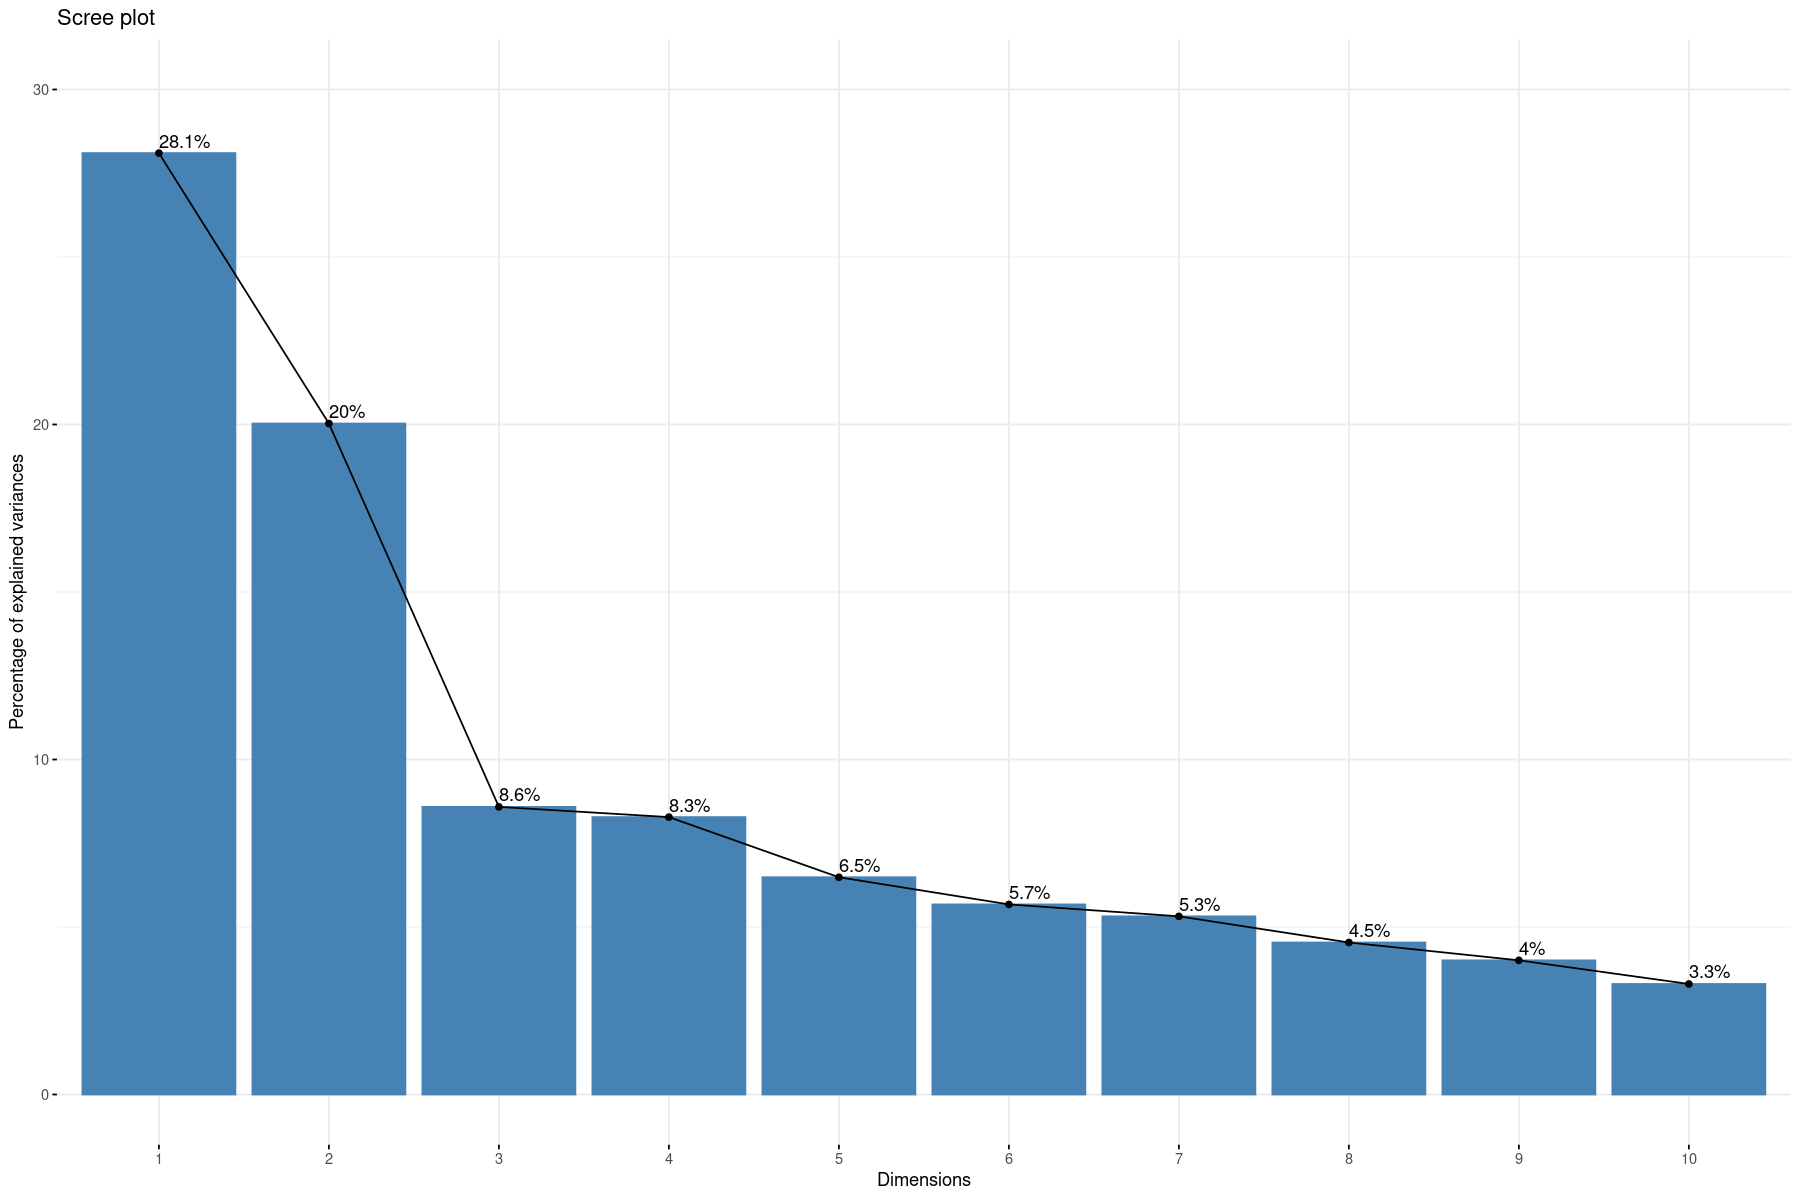

In [28]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,30))

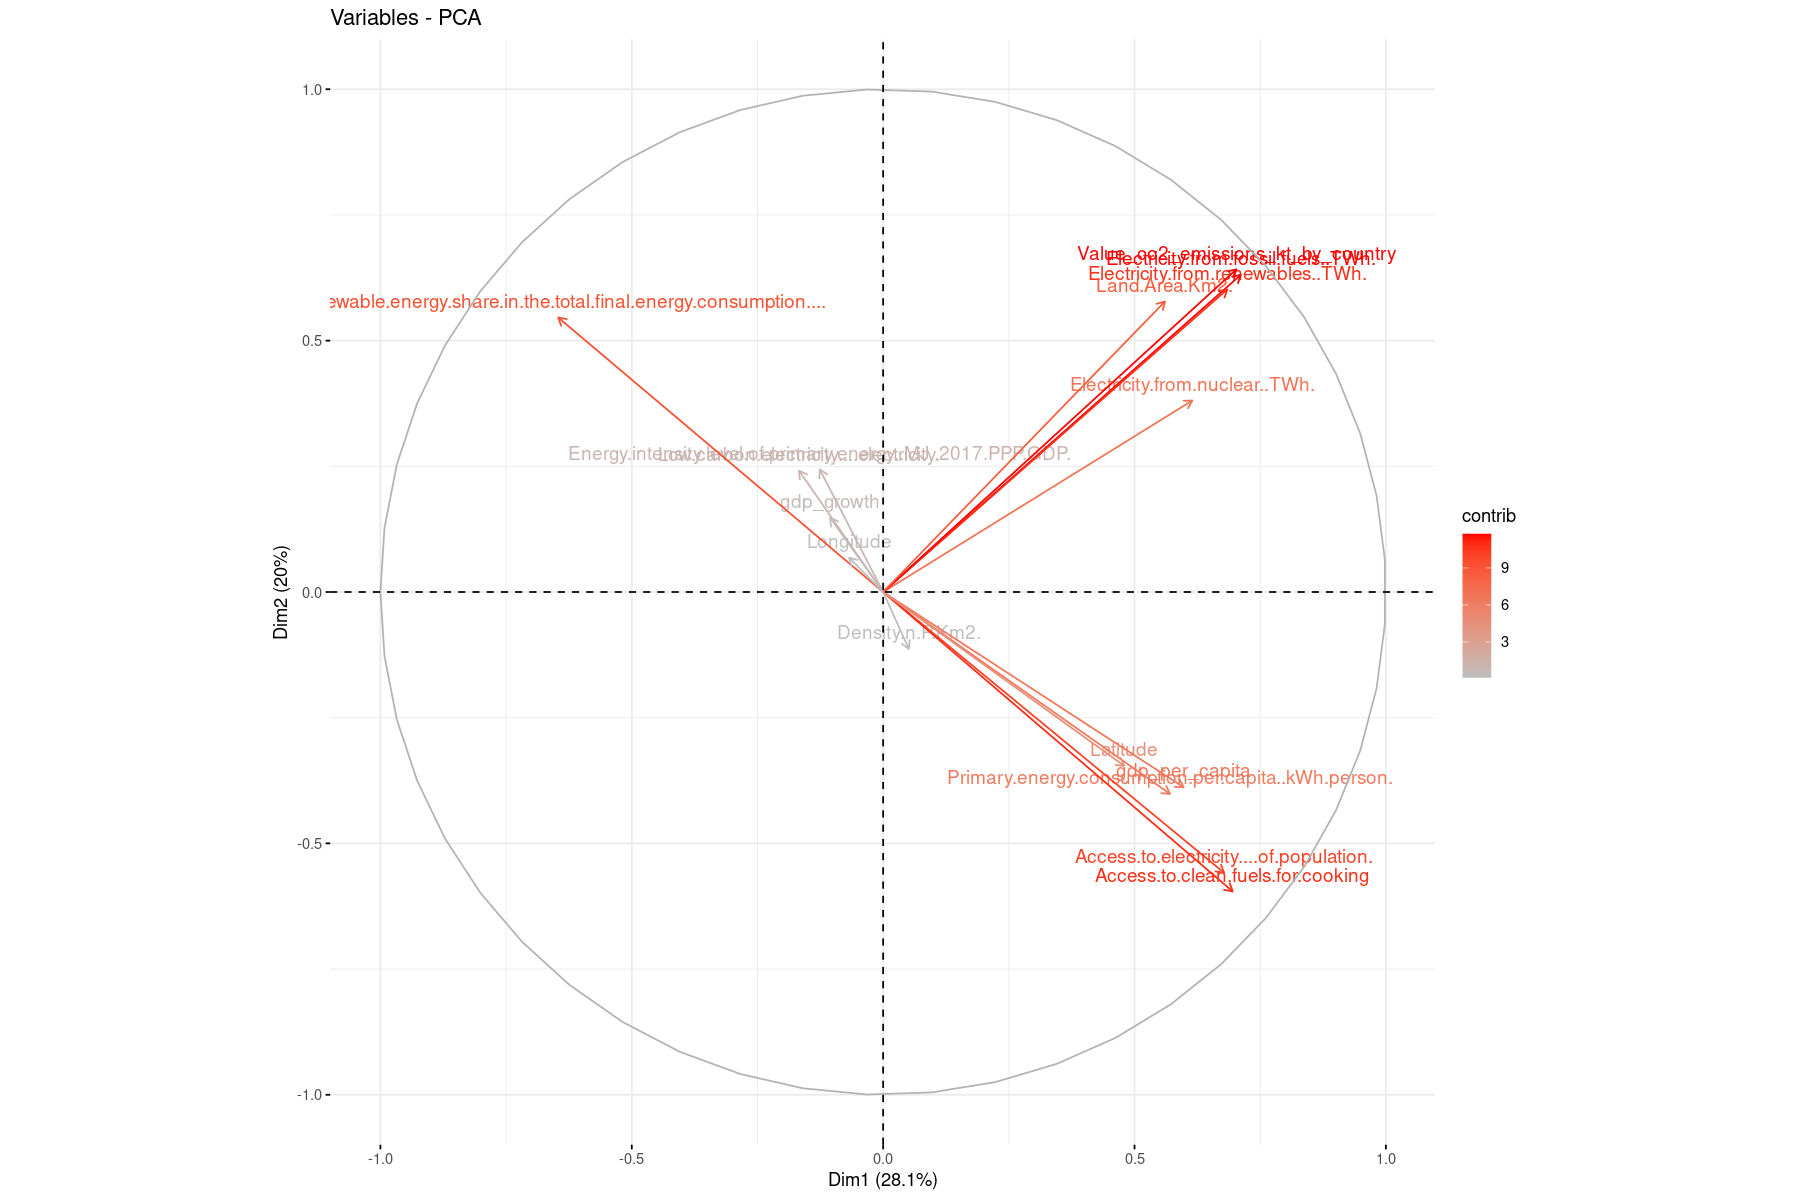

In [29]:
var=get_pca_var(resultat_pca)
fviz_pca_var(resultat_pca,col.var= "contrib",gradient.cols=c("grey", "red"))

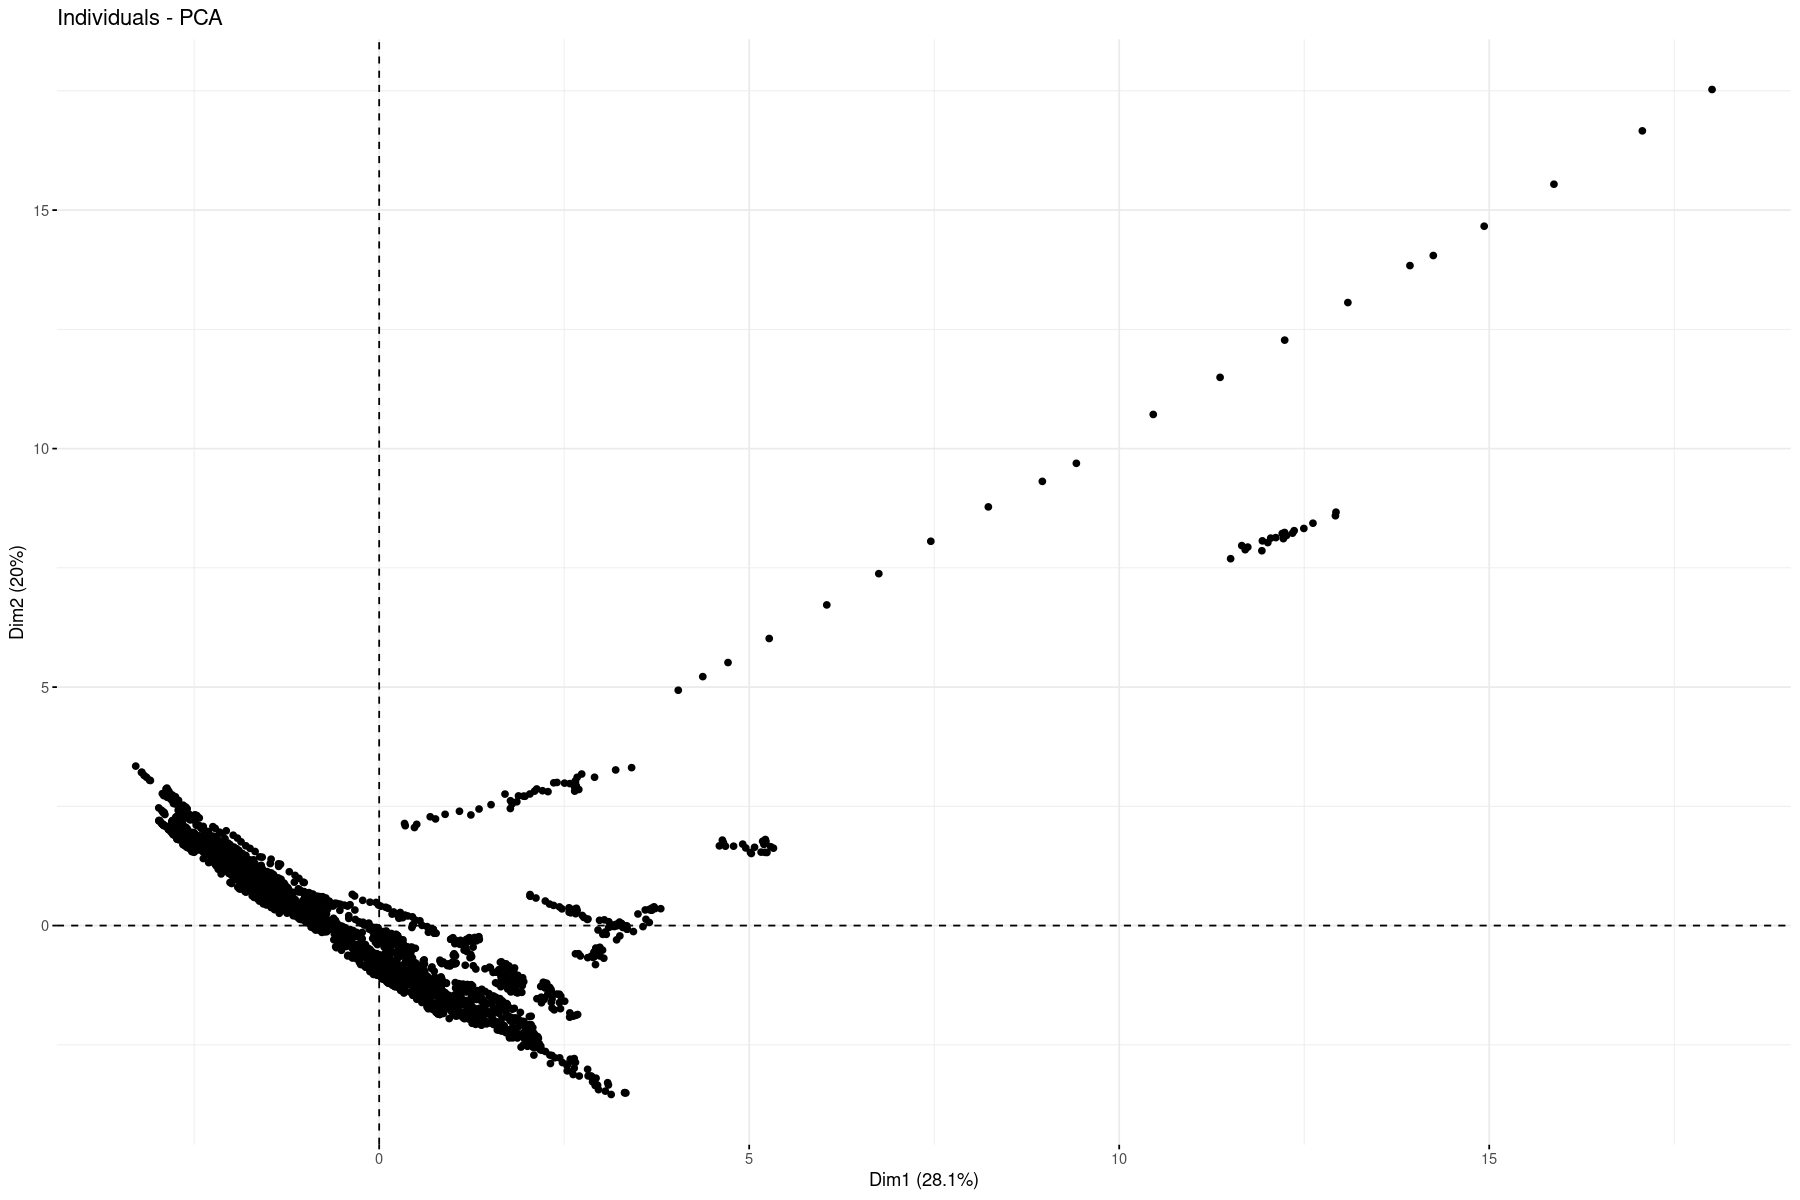

In [32]:
fviz_pca_ind(resultat_pca, label= "none")